In [83]:
# Import des librairies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import pickle

In [4]:
# Import des données
second_hand_cars_data = pd.read_csv("DATA/second-hand-cars.csv")

In [5]:
# Copie des données
df = second_hand_cars_data.copy()

In [12]:
# Affichage des dimensions des données d'entraînement
df.shape

(4345, 9)

In [ ]:
# Affichage de l'entête des données d'entraînement
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
# Affichage des marques (variable catégorielle) distinctes dans les données d'entraînement
df["Brand"].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [18]:
df["Body"].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [19]:
df["Engine Type"].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [20]:
df["Registration"].unique()

array(['yes', 'no'], dtype=object)

In [21]:
df["Model"].unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
       'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Vito', 'Hilux', 'Polo',
       'Outlander', 'A8', 'Touareg', 'Colt', 'GLS 500', '100', 'Z4',
       'Pajero Wagon', 'X5', 'Caddy', 'Camry', '528', 'TT', 'A4',
       'G 55 AMG', 'X6', 'Galant', '525', 'E-Class', 'Kangoo', 'ML 350',
       'GLS 350', '730', 'Trafic', 'X5 M', 'S 350', 'Lancer', 'Scenic',
       '330', 'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle',
       'Avensis', 'GL 320', 'GL 350', 'GL 450', 'Lancer X', '200', '520',
       'Tiguan', 'Outlander XL', 'A5', 'X6 M', 'Golf III', 'A 150',
       'FJ Cruiser', 'Golf GTI', 'Koleos', 'T4 (Transporter)',
       'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza', '80',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240',
       'Passat CC', 'I3', 'Multivan', 'Vaneo'

<Axes: xlabel='Body', ylabel='count'>

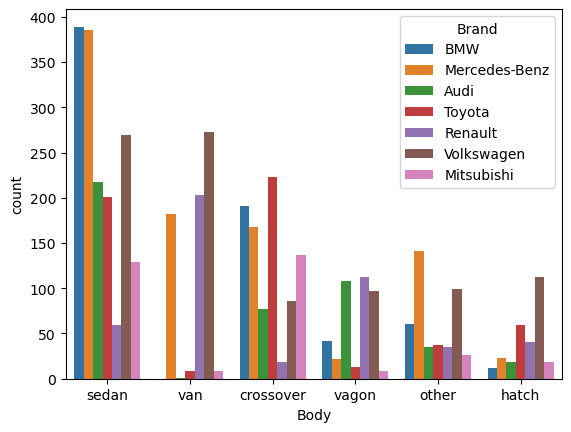

In [24]:
sns.countplot(x="Body", hue="Brand", data=df)

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


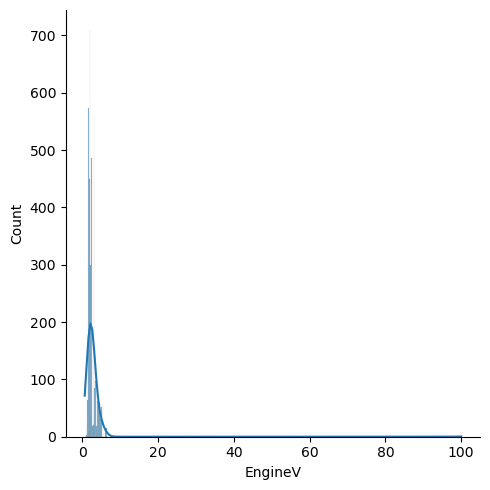

In [26]:
sns.displot(df["EngineV"].dropna(), kde=True)

In [27]:
df.drop(columns=["Registration", "Year", "Model"])

,Brand,Price,Body,Mileage,EngineV,Engine Type
0,BMW,4200.0,sedan,277,2.0,Petrol
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas
3,Audi,23000.0,crossover,240,4.2,Petrol
4,Toyota,18300.0,crossover,120,2.0,Petrol
...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel
4341,BMW,6500.0,sedan,1,3.5,Petrol
4342,BMW,8000.0,sedan,194,2.0,Petrol
4343,Toyota,14200.0,sedan,31,NaN,Petrol


<Axes: >

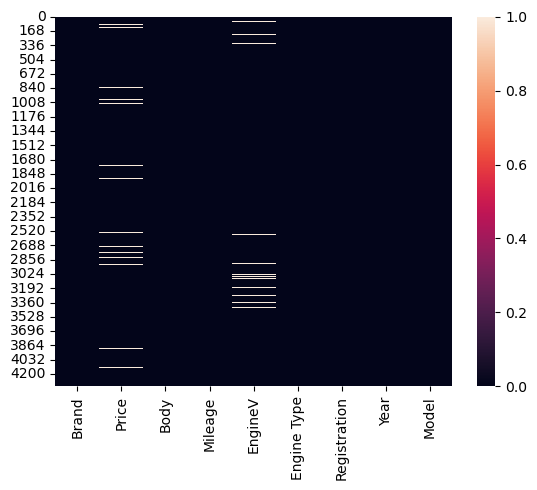

In [31]:
sns.heatmap(df.isnull())

In [32]:
df.isnull().sum() / df.shape[0]

Brand           0.000000
Price           0.039586
Body            0.000000
Mileage         0.000000
EngineV         0.034522
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

In [34]:
df = df.dropna(axis=0)
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [35]:
df.shape

(4025, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


<Axes: xlabel='Brand', ylabel='count'>

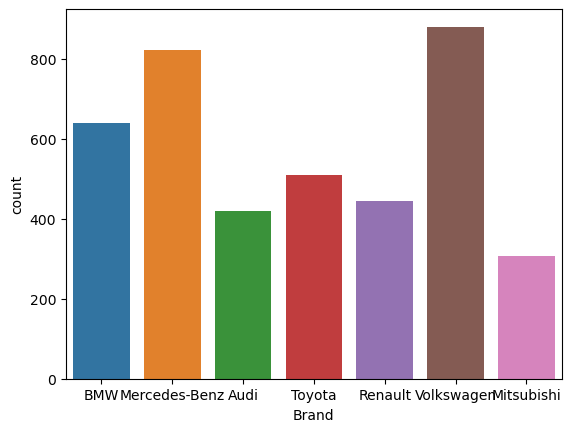

In [38]:
sns.countplot(x="Brand", data=df)

<Axes: xlabel='Body', ylabel='count'>

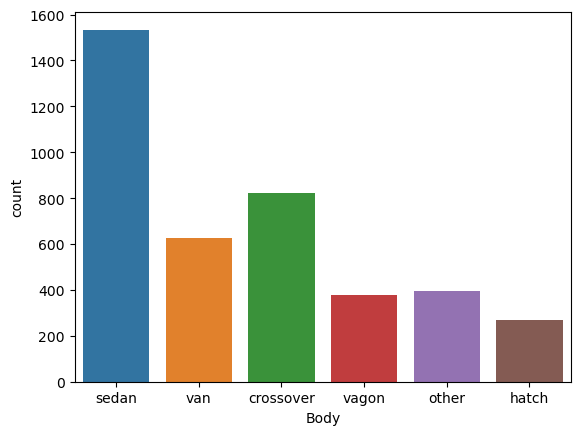

In [39]:
sns.countplot(x="Body", data=df)

<Axes: xlabel='Brand', ylabel='Price'>

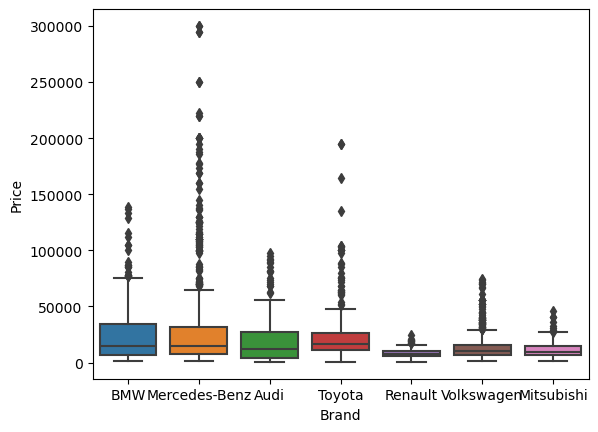

In [40]:
sns.boxplot(x="Brand", y="Price", data=df)

Il ne semble pas avoir de corrélation significante entre le prix et la marque

<Axes: xlabel='Body', ylabel='Price'>

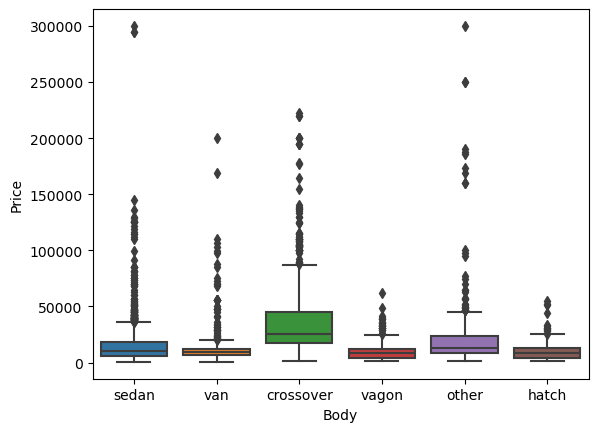

In [41]:
sns.boxplot(x="Body", y="Price", data=df)

Il semble avoir une petite coorelation entre le type de voiture et le prix : les 4x4 semble généralement plus chère que les autres types

## 2. Modélisation

In [44]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,1999,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,2003,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 324 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Price                      float64
 1    Mileage                    int64  
 2    EngineV                    float64
 3    Year                       int64  
 4    Brand_BMW                  bool   
 5    Brand_Mercedes-Benz        bool   
 6    Brand_Mitsubishi           bool   
 7    Brand_Renault              bool   
 8    Brand_Toyota               bool   
 9    Brand_Volkswagen           bool   
 10   Body_hatch                 bool   
 11   Body_other                 bool   
 12   Body_sedan                 bool   
 13   Body_vagon                 bool   
 14   Body_van                   bool   
 15   Engine Type_Gas            bool   
 16   Engine Type_Other          bool   
 17   Engine Type_Petrol         bool   
 18   Registration_yes           bool   
 19   Model_100                  boo

In [51]:
df1 = df.copy()
df2 = df.copy()

In [54]:
df1[df1.select_dtypes(include=bool).columns] = df1.select_dtypes(include=bool).astype(int)

In [57]:
df1.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 324 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Price                      float64
 1    Mileage                    int64  
 2    EngineV                    float64
 3    Year                       int64  
 4    Brand_BMW                  int32  
 5    Brand_Mercedes-Benz        int32  
 6    Brand_Mitsubishi           int32  
 7    Brand_Renault              int32  
 8    Brand_Toyota               int32  
 9    Brand_Volkswagen           int32  
 10   Body_hatch                 int32  
 11   Body_other                 int32  
 12   Body_sedan                 int32  
 13   Body_vagon                 int32  
 14   Body_van                   int32  
 15   Engine Type_Gas            int32  
 16   Engine Type_Other          int32  
 17   Engine Type_Petrol         int32  
 18   Registration_yes           int32  
 19   Model_100                  int

In [63]:
df = df1
df.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X = df.drop(["Price"], axis=1).values
y = df["Price"].values.reshape(-1, 1)

X.shape, y.shape

((4025, 323), (4025, 1))

In [67]:
# partitionner les données -> entraînement / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
print(f"{X_train.shape}, {y_train.shape}")
print(f"{X_test.shape}, {y_test.shape}")

(2817, 323), (2817, 1)
(1208, 323), (1208, 1)


In [ ]:
# (1) instancier le modèle
model_lr = LinearRegression()
model_rf = RandomForestRegressor()

In [72]:
# (2a) entraîne le modèle linéaire
model_lr.fit(X_train, y_train)

LinearRegression()

In [78]:
# (3a) évaluer le modèle
score_lr = model_lr.score(X_test, y_test)
print(score_lr)

0.71230089246981


In [79]:
# (2b) entraîne le modèle random forest
model_rf.fit(X_train, y_train)

C:\Users\h.junior\AppData\Local\Temp\ipykernel_22500\3036459924.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


RandomForestRegressor()

In [81]:
# (3b) évaluer le modèle
score_rf = model_rf.score(X_test, y_test)
print(score_rf)

0.9440802240312988


In [84]:
# sauvegarder un modèle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model_rf, f)

In [86]:
# pour l'utiliser plus tard
with open("rf_model.pkl", "rb") as f:
    loaded_model_rf = pickle.load(f)

In [87]:
loaded_model_rf.score(X_test, y_test)

0.9440802240312988

In [88]:
# optimisation
model_rf2 = RandomForestRegressor(n_estimators=300)
model_rf2.fit(X_train, y_train)
model_rf2.score(X_test, y_test)

C:\Users\h.junior\AppData\Local\Temp\ipykernel_22500\644592845.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf2.fit(X_train, y_train)


0.9459477927310079